In [24]:
#moveies[condition](copy of dataframe)
#movies.loc[condition](dataframe)
#dataframe copy ..=... .copy()
#C:\Users\manos\Desktop\BDA\BasketDataAnalysis\cbb.csv
def train(output,trainer_algorithm):
    import pandas as pd
    import numpy as np
    dataset=pd.read_csv(r"C:\Users\manos\Desktop\BDA\BasketDataAnalysis\cbb.csv")
    from sklearn.preprocessing import LabelEncoder
    le2=LabelEncoder()
    dataset_train=dataset.loc[dataset['YEAR']!=2019].copy()
    y_train=dataset_train[output]
    dataset_test=dataset.loc[dataset['YEAR']==2019].copy()
    y_test=dataset_test[[output]]
    le2.fit(dataset['CONF'])
    transformed=le2.transform(dataset_train['CONF'])
    dataset_train.loc[:,'CONF']=transformed
    transformed=le2.transform(dataset_test['CONF'])
    dataset_test.loc[:,'CONF']=transformed
    add_output_test=dataset_test[output]
    add_output_train=dataset_train[output]
    add_team_test=dataset_test['TEAM']
    dataset_train=dataset_train.drop(['TEAM','POSTSEASON','SEED',output],axis=1)
    dataset_test=dataset_test.drop(['TEAM','POSTSEASON','SEED',output],axis=1)
    LR=None
    if trainer_algorithm=='Decision Tree':
        from sklearn.tree import DecisionTreeRegressor
        LR=DecisionTreeRegressor(min_samples_split=60,max_leaf_nodes=500,max_depth=1000).fit(dataset_train,y_train);
    elif trainer_algorithm=='Random Forest':
        from sklearn.ensemble import RandomForestRegressor
        LR=RandomForestRegressor(min_samples_split=60,max_leaf_nodes=500,max_depth=1000).fit(dataset_train,y_train)
    else:
        from sklearn.linear_model import LinearRegression
        LR=LinearRegression().fit(dataset_train,y_train)
    if output=='BARTHAG':
        dataset_test.loc[:,'Predicted_'+output]=np.around(LR.predict(dataset_test),decimals=4)
        dataset_test.loc[dataset_test['Predicted_BARTHAG']>1,'Predicted_BARTHAG']=1
    else:
        dataset_test.loc[:,'Predicted_'+output]=np.around((LR.predict(dataset_test)),decimals=1)
        dataset_test.loc[dataset_test['Predicted_'+output]>100,'Predicted_'+output]=100
    from sklearn.metrics import r2_score
    score=r2_score(y_test,dataset_test['Predicted_'+output])
    print("Score: "+str(score))
    dataset_test.loc[:,output]=add_output_test
    dataset_test.loc[:,'TEAM']=add_team_test
    dataset_test=dataset_test[['TEAM','G','W',output,'Predicted_'+output]]
    dataset_test.loc[:,'ERROR']=np.absolute(dataset_test['Predicted_'+output]-dataset_test[output])
    dataset_test=dataset_test.sort_values(by=['W'],ascending=False)
    print(trainer_algorithm)
    print(dataset_test.head(10).to_string())

In [25]:
output=['BARTHAG','2P_O','3P_O']
output2=['Decision Tree','Random Forest','Linear Regression']
for one in output:
    for two in output2:
        train(one,two)
        print('\n')

Score: 0.9476730165483198
Decision Tree
              TEAM   G   W  BARTHAG  Predicted_BARTHAG   ERROR
6         Virginia  38  35   0.9736             0.9589  0.0147
1726       Houston  37  33   0.9439             0.9253  0.0186
29         Gonzaga  37  33   0.9744             0.9253  0.0491
16            Duke  38  32   0.9646             0.9589  0.0057
1513       Buffalo  35  32   0.8819             0.9253  0.0434
32    Michigan St.  39  32   0.9597             0.9589  0.0008
3       Texas Tech  38  31   0.9696             0.9253  0.0443
1506     UC Irvine  36  31   0.7458             0.6987  0.0471
1754     Tennessee  36  31   0.9488             0.9589  0.0101
1526       Wofford  32  30   0.8892             0.8851  0.0041


Score: 0.9589436606327021
Random Forest
              TEAM   G   W  BARTHAG  Predicted_BARTHAG   ERROR
6         Virginia  38  35   0.9736             0.9315  0.0421
1726       Houston  37  33   0.9439             0.9315  0.0124
29         Gonzaga  37  33   0.9744 

In [69]:
#C:\Users\manos\Desktop\BDA\BasketDataAnalysis\cbb.csv
def train(output,trainer_algorithm,attributes):
    import pandas as pd
    import numpy as np
    dataset=pd.read_csv(r"C:\Users\manos\Desktop\BDA\BasketDataAnalysis\cbb.csv")
    dataset_train=dataset.loc[dataset['YEAR']!=2019].copy()
    y_train=dataset_train[output]
    dataset_test=dataset.loc[dataset['YEAR']==2019].copy()
    y_test=dataset_test[output]
    add_output_test=dataset_test[output]
    add_output_train=dataset_train[output]
    add_team_test=dataset_test['TEAM']
    add_G_test=None
    add_W_test=None
    add_G_test=dataset_test['G']
    add_W_test=dataset_test['W']
    dataset_train=dataset_train[attributes]
    dataset_test=dataset_test[attributes]
    LR=None
    if trainer_algorithm=='Decision Tree':
        from sklearn.tree import DecisionTreeRegressor
        LR=DecisionTreeRegressor(min_samples_split=60,max_leaf_nodes=500,max_depth=1000).fit(dataset_train,y_train);
    elif trainer_algorithm=='Random Forest':
        from sklearn.ensemble import RandomForestRegressor
        LR=RandomForestRegressor(min_samples_split=60,max_leaf_nodes=500,max_depth=1000).fit(dataset_train,y_train)
    else:
        from sklearn.linear_model import LinearRegression
        LR=LinearRegression().fit(dataset_train,y_train)
    if output=='BARTHAG':
        dataset_test.loc[:,'Predicted_'+output]=np.around(LR.predict(dataset_test),decimals=4)
        dataset_test.loc[dataset_test['Predicted_BARTHAG']>1,'Predicted_BARTHAG']=1
    else:
        dataset_test.loc[:,'Predicted_'+output]=np.around((LR.predict(dataset_test)),decimals=1)
        dataset_test.loc[dataset_test['Predicted_'+output]>100,'Predicted_'+output]=100

    from sklearn.metrics import r2_score
    score=r2_score(y_test,dataset_test['Predicted_'+output])
    print("Score: "+str(score))
    dataset_test.loc[:,output]=add_output_test
    dataset_test.loc[:,'TEAM']=add_team_test
    dataset_test.loc[:,'G']=add_G_test
    dataset_test.loc[:,'W']=add_W_test
    dataset_test=dataset_test[['TEAM','G','W',output,'Predicted_'+output]]
    dataset_test.loc[:,'ERROR']=np.absolute(dataset_test['Predicted_'+output]-dataset_test[output])
    dataset_test=dataset_test.sort_values(by=['W'],ascending=False)
    print(trainer_algorithm)
    print(dataset_test.head(10).to_string())

In [70]:
def before_train(attributes):
    output=['BARTHAG','2P_O','3P_O']
    output2=['Decision Tree','Random Forest','Linear Regression']
    for one in output:
        for two in output2:
            train(one,two,attributes)
            print('\n')

In [71]:
before_train(['G','W'])

Score: 0.6313960880300524
Decision Tree
              TEAM   G   W  BARTHAG  Predicted_BARTHAG   ERROR
6         Virginia  38  35   0.9736             0.9345  0.0391
1726       Houston  37  33   0.9439             0.9345  0.0094
29         Gonzaga  37  33   0.9744             0.9345  0.0399
16            Duke  38  32   0.9646             0.9345  0.0301
1513       Buffalo  35  32   0.8819             0.9345  0.0526
32    Michigan St.  39  32   0.9597             0.9345  0.0252
3       Texas Tech  38  31   0.9696             0.9345  0.0351
1506     UC Irvine  36  31   0.7458             0.9345  0.1887
1754     Tennessee  36  31   0.9488             0.9345  0.0143
1526       Wofford  32  30   0.8892             0.7081  0.1811


Score: 0.6453758271522153
Random Forest
              TEAM   G   W  BARTHAG  Predicted_BARTHAG   ERROR
6         Virginia  38  35   0.9736             0.9350  0.0386
1726       Houston  37  33   0.9439             0.9350  0.0089
29         Gonzaga  37  33   0.9744 

In [72]:
before_train(['ADJOE','ADJDE','TOR','TORD','ORB','DRB','ADJ_T'])

Score: 0.9755045534229869
Decision Tree
              TEAM   G   W  BARTHAG  Predicted_BARTHAG   ERROR
6         Virginia  38  35   0.9736             0.9558  0.0178
1726       Houston  37  33   0.9439             0.9254  0.0185
29         Gonzaga  37  33   0.9744             0.9558  0.0186
16            Duke  38  32   0.9646             0.9254  0.0392
1513       Buffalo  35  32   0.8819             0.9254  0.0435
32    Michigan St.  39  32   0.9597             0.9558  0.0039
3       Texas Tech  38  31   0.9696             0.9254  0.0442
1506     UC Irvine  36  31   0.7458             0.6915  0.0543
1754     Tennessee  36  31   0.9488             0.9558  0.0070
1526       Wofford  32  30   0.8892             0.8642  0.0250


Score: 0.9850320899895498
Random Forest
              TEAM   G   W  BARTHAG  Predicted_BARTHAG   ERROR
6         Virginia  38  35   0.9736             0.9334  0.0402
1726       Houston  37  33   0.9439             0.9273  0.0166
29         Gonzaga  37  33   0.9744 

In [74]:
before_train(['ADJOE','ADJDE','TOR','TORD','ORB','DRB','ADJ_T','2P_D','3P_D'])

Score: 0.9755045534229869
Decision Tree
              TEAM   G   W  BARTHAG  Predicted_BARTHAG   ERROR
6         Virginia  38  35   0.9736             0.9558  0.0178
1726       Houston  37  33   0.9439             0.9254  0.0185
29         Gonzaga  37  33   0.9744             0.9558  0.0186
16            Duke  38  32   0.9646             0.9254  0.0392
1513       Buffalo  35  32   0.8819             0.9254  0.0435
32    Michigan St.  39  32   0.9597             0.9558  0.0039
3       Texas Tech  38  31   0.9696             0.9254  0.0442
1506     UC Irvine  36  31   0.7458             0.6915  0.0543
1754     Tennessee  36  31   0.9488             0.9558  0.0070
1526       Wofford  32  30   0.8892             0.8642  0.0250


Score: 0.984524583749588
Random Forest
              TEAM   G   W  BARTHAG  Predicted_BARTHAG   ERROR
6         Virginia  38  35   0.9736             0.9330  0.0406
1726       Houston  37  33   0.9439             0.9277  0.0162
29         Gonzaga  37  33   0.9744  

In [12]:
import pandas as pd
import numpy as np
dataset=pd.read_csv(r"C:\Users\manos\Desktop\BDA\BasketDataAnalysis\cbb.csv")
dataset_train=dataset.loc[dataset['YEAR']!=2019].copy()
dataset_test=dataset.loc[dataset['YEAR']==2019].copy()
print(dataset_train.size/len(dataset.columns))
print(dataset_test.size/len(dataset.columns))

1404.0
353.0


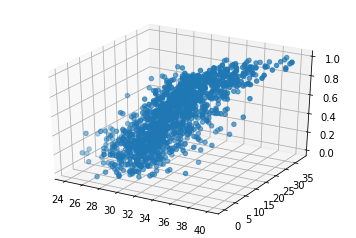

In [26]:
import pandas as pd
import numpy as np
dataset=pd.read_csv(r"C:\Users\manos\Desktop\BDA\BasketDataAnalysis\cbb.csv")
dataset_train=dataset.loc[dataset['YEAR']!=2019].copy()
y_train=dataset_train['BARTHAG']
dataset_train=dataset_train[['G','W']]
%matplotlib inline
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset_train['G'], dataset_train['W'], y_train, 'blue')




